<a href="https://colab.research.google.com/github/Samiyah-sa/Project546/blob/master/canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)
from skimage.color import rgb2gray
from scipy import ndimage as ndi
import cv2
%matplotlib inline

# ...........
from skimage.metrics import (adapted_rand_error,variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour, inverse_gaussian_gradient,
                                  watershed, mark_boundaries)

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


(300, 300, 3)


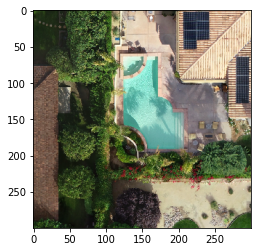

In [0]:
path0 = '/content/gdrive/My Drive/project543'
path = path0+'image-chips'
# read the image 
image = plt.imread('/content/gdrive/My Drive/project543/image-chips/1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
# print the size of the image 
print(image.shape)
# show the image
plt.imshow(image)

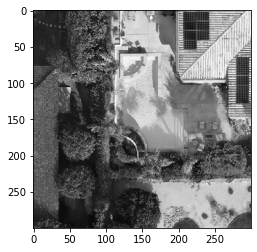

In [0]:
#convert the image to gray level 
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

Text(0.5, 1.0, 'Canny detector')

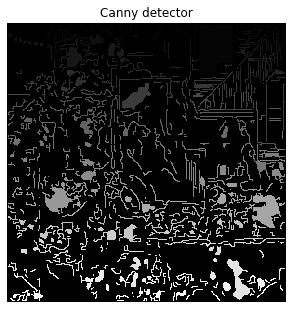

In [0]:
# edge segmentation (canny)
from skimage.feature import canny
edges = canny(gray)
fill_coins = ndi.binary_fill_holes(edges)
image_t = ndi.label(remove_small_objects(fill_coins, 8))[0]
fig, ax = plt.subplots(figsize=(5, 10))
ax.imshow(image_t, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Canny detector')

In [0]:
gray_original = rgb2gray(image)
# compute metrics
Grount_truth_matrix = GT[:,:,0]
print(Grount_truth_matrix.shape)
print(gray_original.shape)
print(Grount_truth_matrix)
print(image_t)


error, precision, recall = adapted_rand_error(Grount_truth_matrix, image_t)
print("Error: " , error)
print("precision: " , precision*100)
print("recall: " , recall*100)

(300, 300)
(300, 300)
[[106  57  77 ... 195 247 249]
 [123  56  64 ... 216 245 246]
 [105  61  65 ... 224 247 249]
 ...
 [ 23  29  50 ...  42  40  46]
 [ 32  25  49 ...  46  40  54]
 [ 40  40  46 ...  40  40  37]]
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0 19  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Error:  0.9895420276184949
precision:  65.57548900026639
recall:  0.5271017255807554
